# SVM (Support Vector Machines)

- 입력 데이터에서 단순한 초평면(hyperplane)으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것 (복잡한 분류문제)

- 서포트 벡터 머신을 분류와 회귀에 모두 사용할 수 있음 <br>
(선형, 비선형 분류, 회귀, 이상치 탐색에도 사용되는 다목적 머신러닝 모델)

In [1]:
# !pip install mglearn

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\MyLaptop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


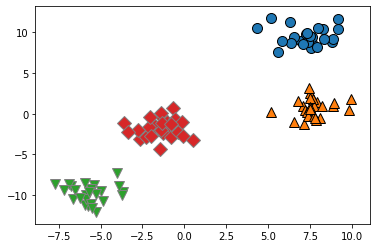

In [6]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X, y = make_blobs(centers=4, random_state=8)

# 이진 분류 세트 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [4]:
# 선형 분류
from sklearn.svm import LinearSVC



- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않음

특성을 추가하여 확장 (2차원 -> 3차원)

- 특성1에서 유용한 세 번째 특성을 추가하여 확장한 데이터 세트
- 3차원 산점도로 표현

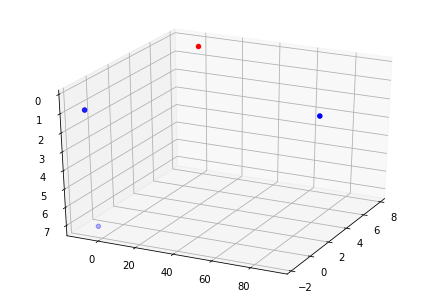

In [11]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:,1:] ** 2])
# X_new.shape

figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r')

SVM을 이용하여 분류

- 선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 구분
- 확장한 3차원 데이터 세트에서 선형 SVM이 만든 결정 경계

In [6]:
model = LinearSYC.fit(X_mew, y)
model.lmer,

# 선형 결정 경계 그리기


In [7]:
# 분류 결과 시각화


- 원래 특성으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님
- 직선보다 타원에 가까운 모습을 확인

## 커널 기법 (Kernel trick)

- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들 수 있음

- 하지만, 어떤 특성을 추가해야 할지 알 수 없고, 특성을 많이 추가하면 연산 비용이 커짐

- 커널 기법 : 새로운 특성을 만들지 않고 고차원 분류기를 학습시킬 수 있음 (데이터 포인트들의 거리를 계산 - 스칼라 곱)

- 고차원 공간 맵핑 방법 : 가우시안 커널, RBF (Radial Basis Function) 커널

- 주로 RBF 커널이 사용

## SVM

- Support Vector : 클래스 사이의 경계에 위치한 데이터 포인트

- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정 -> SVC 객체의 dual_coef_ 속성에 저장

In [8]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()

# 데이터 포인트 그리기


# 서포트 벡터


# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정


- 선형이 아닌 부드러운 비선형 경계를 만들어냄
- C와 gamma 두 매개변수를 사용

#### SVM의 튜닝 (C, gamma)

- gamma 매개변수는 가우시안 커널 폭의 역수에 해당
 - gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정
 - 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐

- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수
 - 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한

In [9]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화


#### SVM 실습 01

유방암 데이터 셋에 SVM 적용

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습


# 평가


- 훈련 세트에는 완벽한 점수를 냈지만 테스트 세트에는 64% 정확도라서 이 모델은 상당히 과대적합

- SVM은 잘 작동하는 편이지만 매개변수 설정과 데이터 스케일에 매우 민감

- 특히 입력 특성의 범위가 비슷해야 하므로 각 특성의 최솟값과 최댓값을 로그 스케일로 변환

In [11]:
# 유방암 데이터 세트의 특성 값 범위 시각화 (y 축은 로그 스케일)


- 유방암 데이터셋의 특성은 자릿수 자체가 완전히 다름

- 일부 모델(선형 모델 등)에서도 어느 정도 문제가 될 수 있지만, 커널 SVM에서는 영향이 아주 큼

##### SVM을 위한 전처리

- 특성 값의 범위가 비슷해지도록 조정하는 것

In [12]:
from sklearn.preprocessing import MinMaxScaler


# 훈련데이터에 대해 스케일링 적용을 위한 조사


# 훈련데이터에 대해 스케일링 적용

# 테스트데이터에 대해 스케일링 적용




##### 스케일링된 데이터를 SVC에 적용하기

In [13]:
# gamma 파라미저 조정


#평가


- 훈련 세트와 테스트 세트의 정확도가 100%에서는 조금 멀어졌지만 매우 비슷해서 확실히 과소적합된 상태

- C나 gamma 값을 증가시켜 좀 더 복잡한 모델을 만들 수 있음

In [14]:
# C 파라미터 조정


#평가


- C 값을 증가시켰더니 모델의 성능이 향상

## 장단점

- SVM은 강력한 모델이며 다양한 데이터셋에서 잘 작동

- SVM은 데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있음

- 저차원과 고차원의 데이터(즉 특성이 적을 때와 많을 때)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음

- 10,000개의 샘플 정도면 SVM 모델이 잘 작동하겠지만 100,000개 이상의 데이터셋에서는 속도와 메모리 관점에서 도전적인 과제

- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 한다는 점

- 그런 이유로 대부분 랜덤 포레스트나 그래디언트 부스팅 같은 (전처리가 거의 또는 전혀 필요 없는) 트리 기반 모델을 애플리케이션에 많이 사용

- SVM 모델은 분석하기도 어렵고 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 하지만 모든 특성이 비슷한 단위이고(예를 들면 모든 값이 픽셀의 컬러 강도) 스케일이 비슷하면 SVM을 시도해볼 만함

- 커널 SVM에서 중요한 매개변수는 C와 gamma이며 모두 모델의 복잡도를 조정하며 둘 다 큰 값이 더 복잡한 모델을 만듬

- 연관성이 많은 이 두 매개변수를 잘 설정하려면 C와 gamma를 함께 조정